# Calculate break-even points.

## Introduction

The profitability threshold formula allows you to know after how many units sold we will obtain a profit, knowing our selling prices, our fixed sides and our variable costs.

This is a threshold, that is to say that below, our company <b> loses money </b>, and above, our company <b> earns money </b>.It is therefore an imperative basic prerequisite to know.

<div style="text-align:center">
<img src="img/rentabilite.jpg">
</div>

In English, the profitability threshold is said to be "Even Breakpoint", the word breakpoint is well representative of the concept of threshold.

<b> Source: Bernard W Taylor "Introduction to management science 11th 2013" </b>

These calculations are taken from the excellent book by Bernard W Taylor under Excel, the results are identical.

Transformed into python by Github Estelle15000.

## Summary

1. <b> Calculate the linear profitability threshold of a single product </b>
    - a.Our basic example
    - b.The formulas
    - c.Calculation with Python
    - d.Graphic visualization of our profits and our profitability threshold
2. <b> Calculate the non -linear profitability threshold in a single product </b>
    - has.Description
    - b.The formulas
    - c.Calculation with Python
    - d.Establish the ideal price of our t shirt and the sales volume.
    - e.Establish our profit and our ideal sale price with the optimization of Scipy
3. <b> Calculate the linear profitability threshold of several products </b>
    - a.Our basic example
    - b.The formulas
    - vs.Calculation with Python
4. <b> Calculate the profitability threshold with regard to turnover </b>
    - a.Our basic example
    - b.The formulas
    - c.Calculation with Python

# 1. Calculate the linear profitability threshold

## a.Our basic example

- Factory X has a fixed cost of 10,000 euros
- Each t shirt produced has a variable cost of 8 euros
- She sends them 23 euros per unit.

From how many t shirts sold the business will make a profit?

## b.The formulas

<b> Costs calculation formula: </b>

- Total cost = total fixed costs + total variable costs
- Variable cost = cost by jeans
- Fixed cost = total cost of the factory

<b> Profit calculation formula: </b>
- Total profit = total income - total cost
- Z = V * P - Cf - V * CV

Or

- V = sales volume (i.e., request)
- p = fixed price
- Cf = fixed cost
- CV = variable cost

<b> Formula of the profitability threshold: </b>

- profitability threshold = fixed costs / (price - variable cost)


## c. Computation using Python

In [9]:
# Our data
fixed_costs = 10000
unit_price = 23
variable_cost = 8
sales = 1000

# Our profit if we sell 1000 tshirts
# P = v * p - cf - v * cv
profit = sales * unit_price - fixed_costs - sales * variable_cost

print (" Our profit for 1000 T -shirts sold will be:", profit," euros")


#Formula of the profitability threshold:
fixed_costs = fixed_costs / (unit_price - variable_cost)

print("The company will be profitable from:", fixed_costs, "t shirts producted")


 Our profit for 1000 T -shirts sold will be: 5000  euros
The company will be profitable from: 666.6666666666666 t shirts producted


## d. Graphic viewing of our profits and our profitability threshold

We see using the graph our profitability threshold at 667 units sold, and the profit which then rises linearly.
It means that if we embark on the production of this t shirt, it is absolutely necessary to sell more than 667 to earn money!

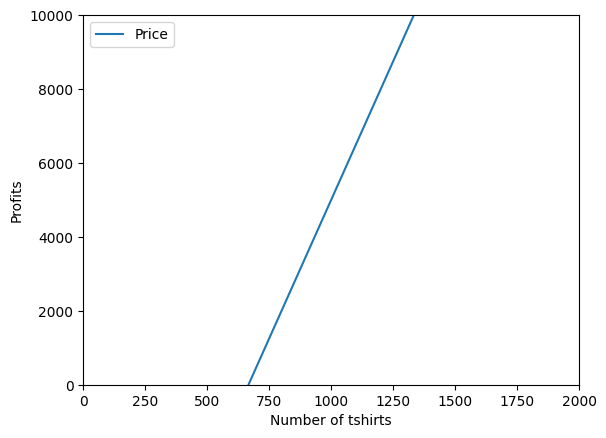

In [10]:
import matplotlib.pyplot as plt
import math

# On définit l'étendue (range)
p_cords = range(2000)

# On définit les fonctions.
prix_objet_A = [p * 23 - 10000 - p * 8  for p in p_cords] 

# On trace
plt.plot(p_cords,prix_objet_A, label="Price")

plt.xlabel("Number of tshirts")
plt.ylabel("Profits")
plt.xlim(0,2000)
plt.ylim(0,10000)
plt.legend(loc="upper left")
plt.show()

# 2. Calculate the non -linear profitability threshold

## a.Description

The linear model is a bit simplistic and does not describe the real attitude of consumers, we prefer to use the linear equation of demand to describe the attitude of the consumer, and include it in our formulas previously developed.

<b> Quote from Bernard W Taylor: </b>
Reason to go into non -linear:
An important but somewhat unrealistic hypothesis of this profitability model is that the volume, or demand, is independent of the price (that is to say that the volume remains constant, whatever the price of product).
It would be more realistic that demand varies as the price increases or decreases.For our basic example.


Suppose that the dependence on demand on the price is defined by the following linear function:
V = 1,500 - 24.6p
It means that if the price exceeds 60.98 euros then there is no more request at all.

## We trace this equation of demand

We see that the request decreases according to the price, and that in 60, 98 euros, it becomes negative.The reaction of potential buyers is quantified mathematically speaking.

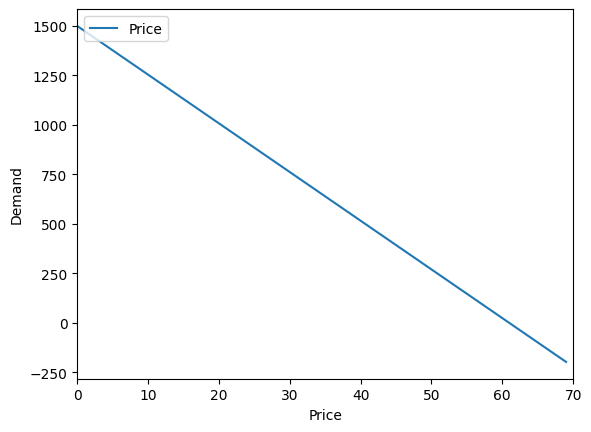

In [11]:
import matplotlib.pyplot as plt
import math

# Our range
p_cords = range(70)

# Define function
linear_price = [1500 - 24.6 * p   for p in p_cords] 

# Tracing
plt.plot(p_cords,linear_price, label="Price")

plt.xlabel("Price")
plt.ylabel("Demand")
plt.xlim(0,70)
plt.legend(loc="upper left")
plt.show()

## c. Compute using Python

Now, the sales volume is no longer a discreet number of 1000, but it is replaced in our profit formula by the linear equation of the specified demand previously.

This causes an elevation to the square of the unit price, which brings us into the world of "non -linear".

In [12]:
# our data 
fixed_costs = 10000
unit_price = 23
variable_cost = 8
sales = 1500 - 24.6 * unit_price # Notice that this is no longer a discreet number, but an equation!

# Our profit if we sell 1000 t shirts:
# P = v * p - cf - v * cv
profit = sales * unit_price - fixed_costs - sales * variable_cost
print (" Our profit for 1000 T -shirts sold will be: ", profit)


 Our profit for 1000 T -shirts sold will be:  4012.999999999999


## tracing our profits curve

We enter the profit equation which results from the inclusion of our equation of demand, and we draw our forecast graph.

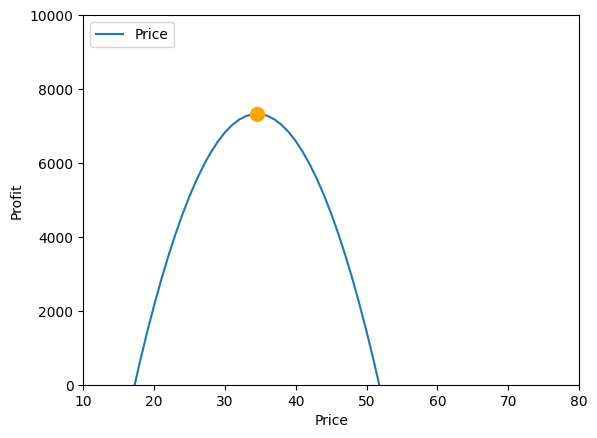

In [13]:
import matplotlib.pyplot as plt
import math

# On définit l'étendue (range)
p_cords = range(70)

# On définit les fonctions.
price = [1698.8 * p - 24.6 * p ** 2 - 22000  for p in p_cords] 

# On trace
plt.plot(p_cords,price, label="Price")

plt.xlabel("Price")
plt.ylabel("Profit")
plt.xlim(10,80)
plt.ylim(0,10000)
plt.legend(loc="upper left")
plt.plot(34.52,7328,'o',markersize=10,color='orange')
plt.show()



# d.Establish our ideal price and our sales volume.

Well, we now have to establish our non -linear profitability threshold, based on this linear equation of the request provided by the sales department.

If we look at our profit curve, the profitability threshold is the value or slope of the curve is zero.

(The slope = to zero is the derivative of the east curve = to 0 because the derivative is a measure of the slope of the curve.)

To calculate it, you have to calculate the derivative, then find the value for the highest point or the slope is = to zero.

The derivative of the profit function is:

- Profit function = 1696.8 - 24.6 * P² - 22,000
- derivative = 1696.8 - 49.2 * P
- derivative in 0 = 1696.8 - 49.2 * p

Note: The results are the same as those in the book.

In [14]:
# The derivative in zero which gives us the ideal price
prix_ideal = 1696.8 / 49.2 
print("Ideal price of a t shirt: " , prix_ideal, "euros")


# The volume of T -shirt to produce is calculated by substituting the ideal price
# In the Linear Equation given had early
# v  = 1500 - 24.6  * (34,49)
v = 1500 - 24.6  * 34.49
print("Volume of T -shirts to be produced: " , v)

Ideal price of a t shirt:  34.48780487804878 euros
Volume of T -shirts to be produced:  651.5459999999999


# e.Establish our profit and our ideal sale price with the optimization of Scipy

Rather than taking the derivative as in the previous example, we will use Spipy Optimize to calculate the highest point of our curve, for that we minimize the negative of our equation, because Scipy Optimize has no optionmaximization.It comes back to the same.

In [15]:
from scipy.optimize import minimize_scalar

def objective_function(x):
    return - (1698.8 * x - 24.6 * x ** 2 - 22000)
res = minimize_scalar(objective_function)

# We see that the function reaches a maximum in 34.52 with a profit of 7328
print(res)

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: -7328.469918699189
       x: 34.52845528455206
     nit: 4
    nfev: 9


# 3. Calculate the linear profitability threshold of several products

## Description

Imagine that our company sells 5 different range t shirts, some could be profitable, others not.In the end, the profits may still be good and the company profitable.

We will try to find the calculations to observe all this.